In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
from google.colab import files
import io

In [5]:
d=files.upload()

Saving gld_price_data.csv to gld_price_data (1).csv


In [6]:
df=pd.read_csv(io.StringIO(d['gld_price_data.csv'].decode('utf-8')))

In [7]:
df.head

<bound method NDFrame.head of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [8]:
x=df.iloc[:,1:5]
y=df.iloc[:,5]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=0.25)

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [15]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [12]:
df1=pd.DataFrame({"Actual":y_test,
                  "Predicted":y_pred})

In [13]:
r2_score(y_test,y_pred)*100

74.60115526339904

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

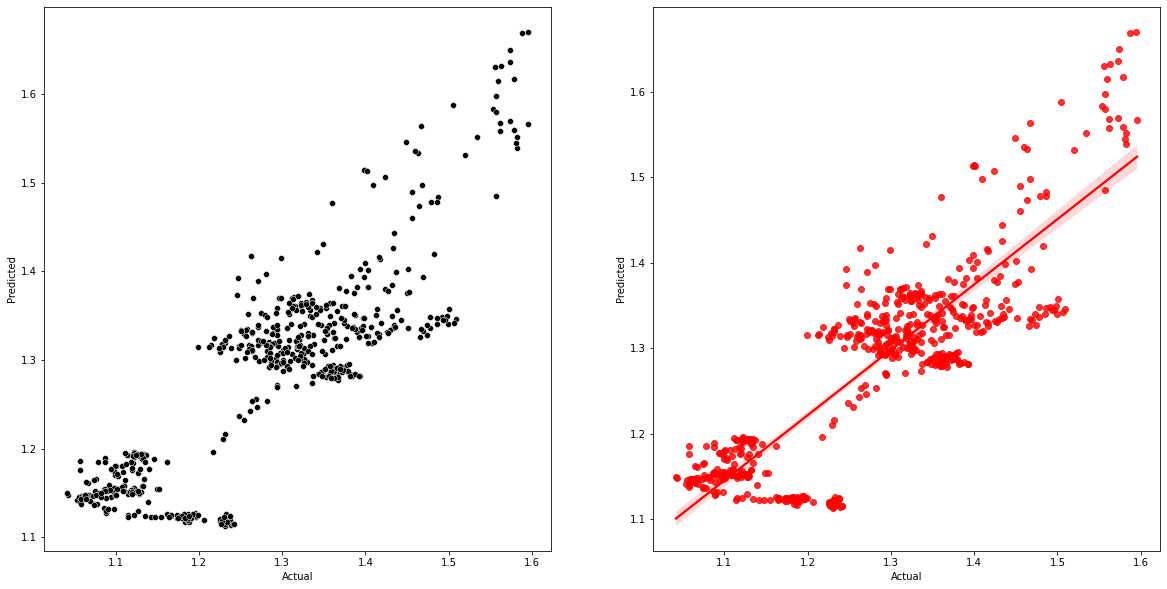

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(x="Actual",y="Predicted",data=df1, color="black")
plt.subplot(1,2,2)
sns.regplot(x="Actual",y="Predicted",data=df1, color="red")